# Example workflow with EXPtools and pyEXP

In this tutorial we will build a basis from a particle distribution, then we will compute coefficients
and reconstruct density and acceleration fields

- [x] Generate particle data with EXPtools.utils
- [ ] Compute empirical basis
- [ ] Compute analytical NFW basis
- [ ] Compute density and acceleration fields
- [ ] Visualize coefficients
- [ ] Commpute fields from selected coefficients 
- [ ] Make 3d renders

In [1]:
%pylab inline
import numpy as np
import pyEXP

import EXPtools 
#import nba
import matplotlib.pyplot as plt
#plt.style.use('~/matplotlib.mplstyle')
import k3d

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
HHalo = EXPtools.utils.halo.ICHernquist(size=500000)
SphericalH = HHalo.triaxial(axis_ratios=[1, 1, 1], rot_angle=0.0)

In [3]:
np.min(norm(SphericalH, axis=1))

0.0005908100584678874

(-200.0, 200.0)

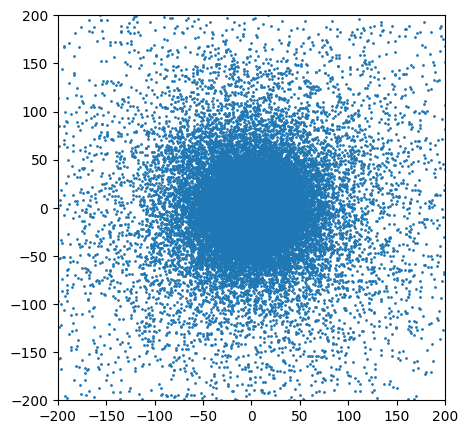

In [4]:
fig, ax = plt.subplots(1, 1,figsize=(5,5))
plt.scatter(SphericalH[:,0], SphericalH[:,1], s=1) 
plt.xlim(-200, 200)
plt.ylim(-200, 200)

In [5]:
basis, coefs = EXPtools.basis_builder.makebasis(SphericalH, np.ones(500000)/500000, basis_model='empirical',
                                                basis_id='sphereSL', time=0.0, numr=100, rmin=0.01, rmax=20,
                                                lmax=5, nmax=10, scale=1, modelname='SLGrid.empirical_hern_halo', 
                                                cachename=".slgrid_sph_hern_empirical", 
                                                add_coef=False, coef_file='hern_empirical_coef.h5')

-> File model not found so we are computing one 

-> Computing empirical model
! Scaling:  R= 20.000000000000004   M= 0.9999999999999989
1.0000000000000002 19699437.56698048 19699437.56698049 19699437.566980485
-> Model computed: rmin=0.010000000000000002, rmax=20.000000000000007, numr=100
No config file provided.
Computing empirical density


---- SLGridSph::ReadH5Cache: error reading <.slgrid_sph_hern_empirical>
---- SLGridSph::ReadH5Cache: HDF5 error is <Unable to open file .slgrid_sph_hern_empirical (File accessibility) Unable to open file>



Tolerance errors in Sturm-Liouville solver for l=0

order          eigenvalue     condition                               
-----          ----------     ---------                               
0              2.421703e-01   too many levels for eigenvalues         
1              1.030765e+00   reliable                                
2              7.553035e+00   reliable                                
3              2.059626e+01   reliable                                
4              3.654330e+01   reliable                                
5              5.947169e+01   too many levels for eigenvectors        
6              8.740598e+01   too many levels for eigenvalues         
7              1.232547e+02   too many levels for eigenvalues         
8              1.494680e+02   too many levels for eigenvalues         
9              1.637231e+02   too many levels for eigenvalues         

Error in BasisFactory constructor: Execution Exception: 
SLGridSph found 6 tolerance errors in

RuntimeError: Execution Exception: 
SLGridSph found 6 tolerance errors in computing SL solutions.
We suggest checking your model file for smoothness and ensure
a sufficient number grid points that the relative difference
between field quantities is <= 0.3.

In [6]:
read_model = np.loadtxt('SLGrid.empirical_hern_halo', skiprows=3)

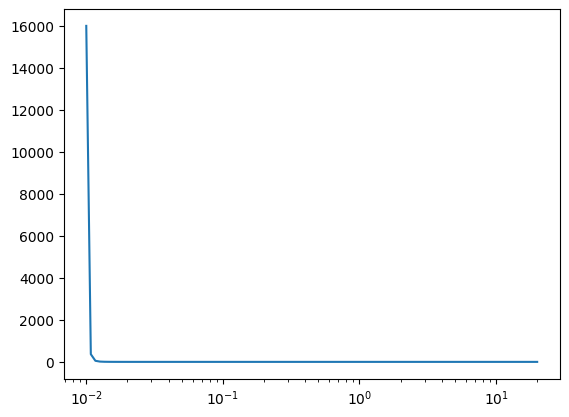

In [9]:
plt.semilogx(read_model[:,0], read_model[:,1])

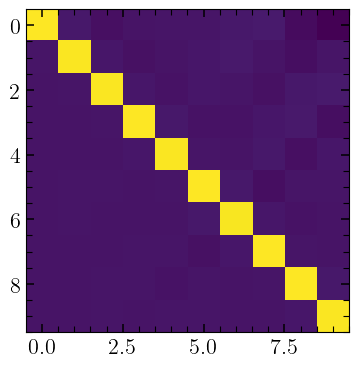

In [14]:
# Check that the basis is orthogonal
plt.imshow(basis.orthoCheck()[0])

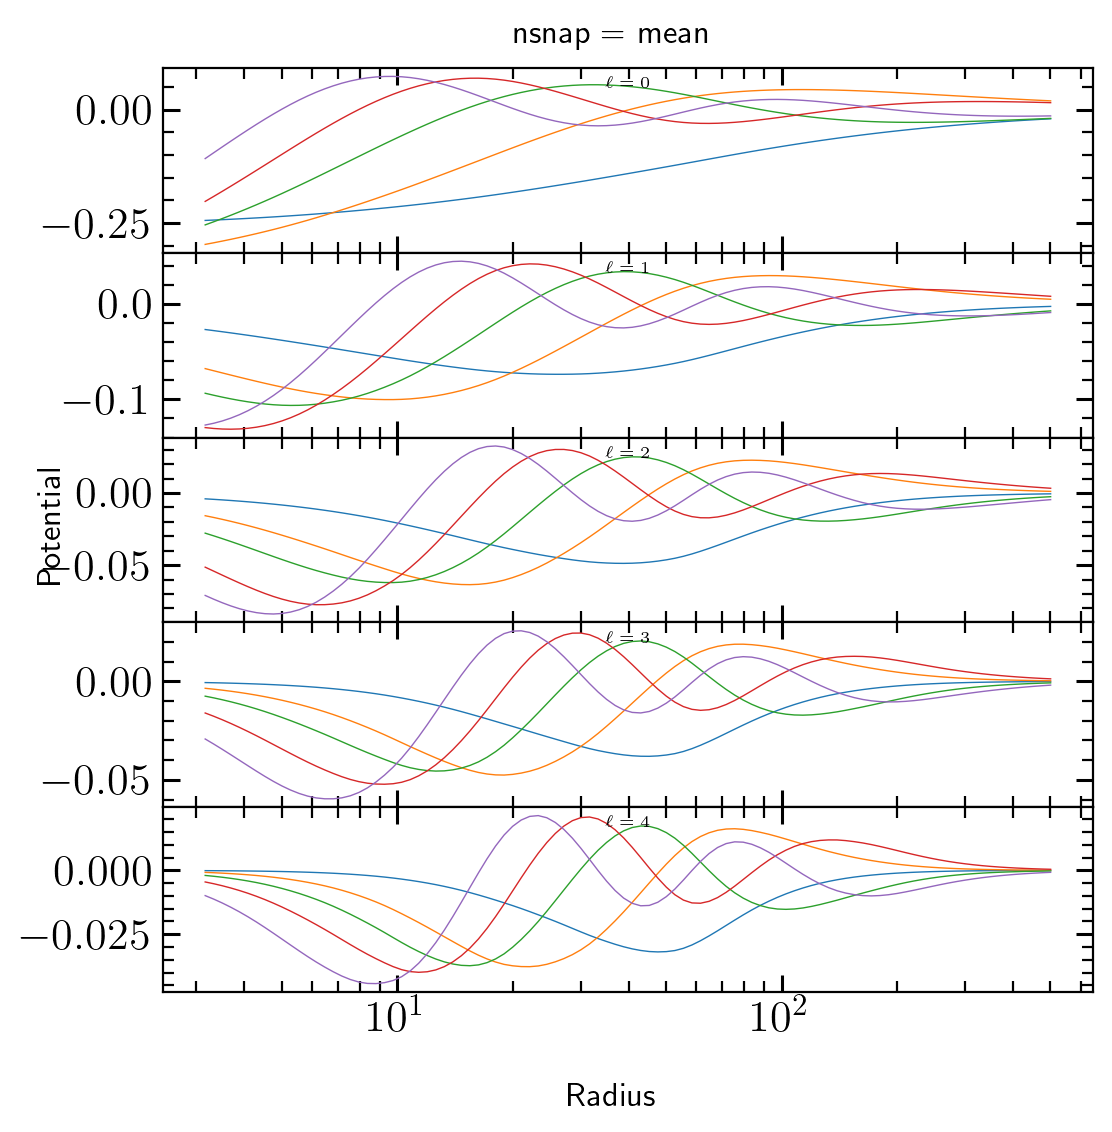

In [15]:
EXP_tools.visualize.make_basis_plot(basis, 5, 5)